# Game Theory: Course project

This is a project simulating a telecommunication network using various protocols for stable matching and optimal selling mechanisms. The simulation was carried out on a network with a specified number of nodes, and the throughput was measured against different input rates. The protocols tested include:

- One-to-One Stable Matching wrt the Nodes
- One-to-One Stable Matching wrt the Channels
- One-to-Many Stable Matching
- Optimal Selling Mechanism with Energy of nodes as the value
- Optimal Selling Mechanism with the maximal probability of success of nodes as the value

## Simulation Setup

The simulation was configured with the following parameters:

- **Number of nodes**: 10
- **Input rates**: 0.5 to 10 with a step of 0.5
- **Trial length**: 2400

### Implementation

The protocols were implemented in the `protocols` module, and the network simulation was performed using the Network class from the `components` module, which contains all the codes for the components of the simulation such as the `Node`, `Channel` and `Network` classes.

In [18]:
from components import Network

num_nodes = 10
network = Network(num_nodes=num_nodes)
input_rates = [i * 0.5 for i in range(0, 2 * num_nodes + 1)]  # from 0.5 to 10 with step of 0.5

### Random matching success probability

the probability of success has been given by $Ee^{-h}$ where $h$ is the channel gain, sampled from an exponential distribution with $\lambda=1$, and E is the harvested energy, sampled from a uniform distribution between 0 and 1.

the average throughput will be the input rate times the probability of success, calculated by:

$$
\mathbb{E}[e^{th}]=\phi(t)=\frac{\lambda}{\lambda-t}=\frac{1}{1-t}\\
p_{success} = \mathbb{E}[Ee^{-h}]=\mathbb{E}[E]\cdot\mathbb{E}[\mathbb{e^{-h}}]=\frac{1}{2}\cdot\frac{1}{2}=\frac{1}{4}
$$

### Optimal matching wrt probability of success

first we observe that the parameter $e^{-h}$ is actually just a uniform variable.

$$\mathbb{P}[H<h]=1-e^{-h}=\mathbb{P}[e^{-H}>e^{-h}]\Rightarrow \mathbb{P}[e^{-H}<e^{-h}]=e^{-h}\Rightarrow e^{-H}\sim\text{Unif}[0, 1]$$

the chosen channel is the channel with the highest probability of success, thus the maximum of n rvs.

$$\text{success probability(random)}=P_s=EC,\quad C=max\{e^{-h_1},\dots, e^{-h_n}\}$$
$$\mathbb{P}(C<c)=\mathbb{P}(C_i<c)^n=c^n$$
for all $0<p<1$:
$$
\mathbb{P}[P_s<p]=\int_0^1\mathbb{P}[EC<p|E]dE=\int_0^1\mathbb{P}[C<\frac{p}{E}]dE=\int_0^p1dE+\int_p^1(\frac{p}{E})^ndE\\
=p+\frac{p-p^n}{n-1}=\frac{np-p^n}{n-1}=F_{P_s}(p)\\
\Rightarrow f_{P_s}(p)=\frac{n-np^{n-1}}{n-1}=\frac{n}{n-1}(1-p^{n-1})
$$

#### Optimal mechanism design

when the value function of our auction is the energy, our auction is clearly efficient since:

$$
c_i(v_i) = E_i - \frac{1-F_{E}(E_i)}{f_{E}(E_i)}=2E_i-1\Rightarrow\text{strictly increasing}
$$

in this case, the function $c_i(v_i)$ will map to the following:

$$
c_i(v_i) = p_i - \frac{1-F_{P_s}(p_i)}{f_{P_s}(p_i)} = p_i - \frac{1-\frac{np_i-p_i^n}{n-1}}{\frac{n}{n-1}(1-p_i^{n-1})}=
p_i-\frac{n(1-p_i)-(1-p_i^n)}{n(1-p_i^{n-1})}=\\
\frac{np_i(1-p_i^{n-1})-n(1-p_i)+(1-p_i^n)}{n(1-p_i^{n-1})}=\frac{(n-1)(p_i^n-1)+2np_i}{n(1-p_i^{n-1})}
$$

which is a strictly increasing function forall $0\leq p\leq 1$, thus our optimal mechanism will be efficient.

proofs of Individually rationalism and Incentive compatibility are well known for the mechanism used.


### Success bound for when everyone selects the best channel

when $n$ channels are available
$$
\mathbb{E}[p_s]=\int_0^1 pf_{P_s}(p)dp = \frac{n}{n-1}\int_0^1 p(1-p^{n-1})dp=\frac{n}{n-1}(\frac{1}{2}-\frac{1}{n+1})=\frac{n}{n-1}\frac{n-1}{2(n+1)}=\frac{n}{2(n+1)}
$$

if we choose the best node and match it with the best channel:

similarly for the best node:
$$\mathbb{P}(E<e)=\mathbb{P}(E_i<e)^n=\max\{1,e\}^n=F_E(e)\Rightarrow f_E(e)=ne^{n-1} \quad P_s^o=CE$$
$$
\mathbb{P}[P_s^o<p]=\int_0^1\mathbb{P}[EC<p|E]nE^{n-1}dE=\int_0^1\mathbb{P}[C<\frac{p}{E}]nE^{n-1}dE=\int_0^pnE^{n-1}dE+\int_p^1(\frac{p}{E})^nnE^{n-1}dE\\
=p^n-np^n\ln(p)=p^n(1-n\ln(p))=F_{P_s^o}(p)\\
\Rightarrow f_{P_s^o}(p)=np^{n-1}(1-n\ln(p))-np^{n}\frac{1}{p}=n^2p^{n-1}\ln(\frac{1}{p})
$$
expected success probability
$$
\mathbb{E}[p_s^o]=\int_0^1 pf_{P_s}(p)dp=-n^2\int_0^1 p^n\ln(p)dp=n^2\frac{1}{(n+1)^2}=(\frac{n}{n+1})^2
$$


### Simulation

In this section we will simulate the protocols for trials with length `1000` to measure the throughput for each protocol, we will also calculate the throughput for when we are just randomly matching channels with nodes to serve as a baseline for performance.

In [19]:
import protocols

trial_length = 2400

# Simulation
one_to_one_results_node     = network.simulate(protocols.OneToOneStableMatching('node'), input_rates, trial_length=trial_length)
one_to_one_results_channel  = network.simulate(protocols.OneToOneStableMatching('channel'), input_rates, trial_length=trial_length)
one_to_many_results         = network.simulate(protocols.OneToManyStableMatching(3), input_rates, trial_length=trial_length)
optimal_results_energy      = network.simulate(protocols.OptimalSellingMechanism('energy'), input_rates, trial_length=trial_length)
optimal_results_probability = network.simulate(protocols.OptimalSellingMechanism('probability'), input_rates, trial_length=trial_length)
random_access_results       = network.simulate(protocols.RandomAccessProtocol(), input_rates, trial_length=trial_length)
# random_matching_results     = { rate: rate / 4 for rate in input_rates }
# optimal_matching_results    = { rate: sum([((num_nodes - i) / (num_nodes - i + 1)) ** 2 for i in range(int(rate))]) for rate in input_rates if int(rate) == rate}

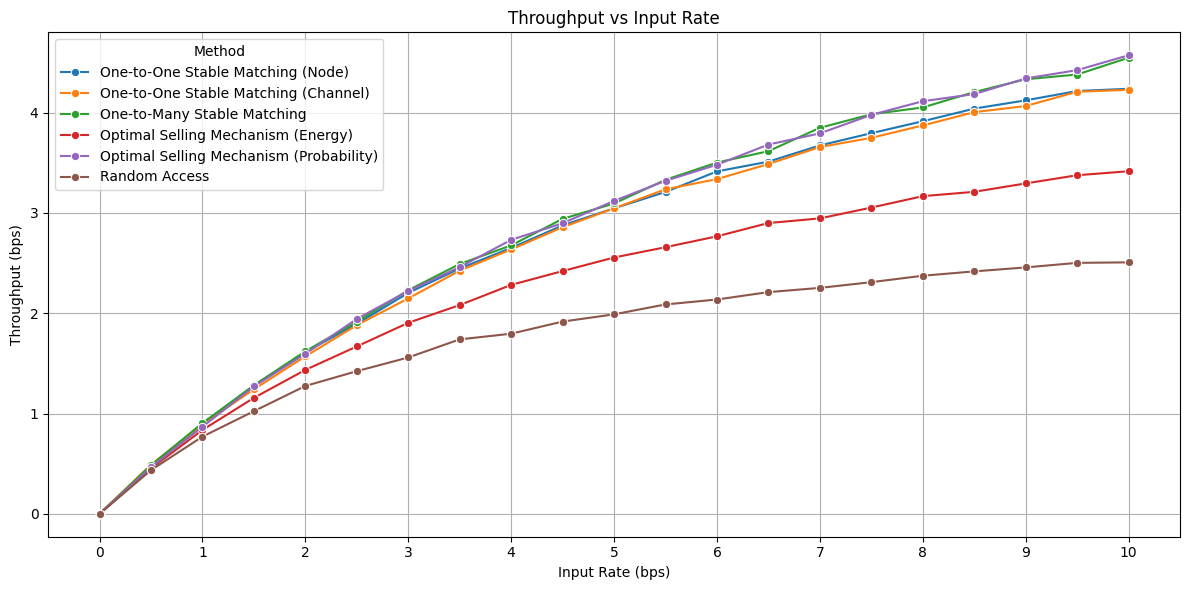

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.DataFrame({
    'Input Rate': list(one_to_one_results_node.keys()) + list(one_to_one_results_channel.keys()) + list(one_to_many_results.keys()) + list(optimal_results_energy.keys()) + list(optimal_results_probability.keys()) + list(random_access_results.keys()),
    'Throughput': list(one_to_one_results_node.values()) + list(one_to_one_results_channel.values()) + list(one_to_many_results.values()) + list(optimal_results_energy.values()) + list(optimal_results_probability.values()) + list(random_access_results.values()),
    'Method': ['One-to-One Stable Matching (Node)']*len(one_to_one_results_node) + ['One-to-One Stable Matching (Channel)']*len(one_to_one_results_channel) + ['One-to-Many Stable Matching']*len(one_to_many_results) + ['Optimal Selling Mechanism (Energy)']*len(optimal_results_energy) + ['Optimal Selling Mechanism (Probability)']*len(optimal_results_probability) + ['Random Access']*len(random_access_results)
})

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x='Input Rate', y='Throughput', hue='Method', data=df, marker='o', errorbar=None, estimator=None)
plt.title('Throughput vs Input Rate')
plt.xlabel('Input Rate (bps)')
plt.ylabel('Throughput (bps)')
plt.grid(True)
plt.tight_layout()
plt.xticks(input_rates[::2])
plt.savefig('results.png')
df.to_csv('results.csv')
plt.show()

The plot above shows the throughput against the input rate for the different protocols.(results save in `results.png` and `results.csv`)

### Analysis
The results indicate the following observations:

- The **One-to-One Stable Matching (Node)** and **One-to-One Stable Matching (Channel)** protocols achieves a relatively high throughput at lower input rates but tends to stabilize as the input rate increases, we also observe minimal differences between the two protocols indicating that in our particular setup, the mode of operation does not matter too much.(which makes sense considering that the effect of the channel and the node are both uniform rv $p_s=Ee^{-h}$)
- The **One-to-Many Stable Matching protocol** generally performs better across a wider range of input rates, demonstrating its efficiency in handling multiple matches. however since in our implementation, the gains are all random variables with respect to nodes, the effect is not substantial since there is no clear *good channel* with respect to all nodes, if there were any, we would see superior results with most nodes choosing that superior channel. however, despite this we still observe some meaningful improvement between the two.
- The **Optimal Selling Mechanism (Energy)** protocol performs worse than all of our other protocols but still much better than the **Random Matching** protocol, showcasing good performance but not the best protocol in this scenario as it seems.
- The **Optimal Selling Mechanism (Probability)** protocol shows superior performance, specially wrt the **Optimal Selling Mechanism (Energy)** protocol, highlighting their potential for maximizing throughput, and the importance of choosing the right value function.
- The **Random Matching (Theory)** serves as a baseline, showing a consistent but lower throughput compared to the other protocols.

### Effects of performing matching first

one may ask that what would be the effect of matching the nodes and channels first, regardless of whether they have a packet or not.
intuitively, we expect worse performance when we don't take into consideration that only the nodes with packets will be sending.

regardless in this section we implement this modified version to see the difference and the magnitude of the the effect.

In [14]:
import protocols
from components import Network

num_nodes = 10
network = Network(num_nodes=num_nodes, match_before=True)
input_rates = [i * 0.5 for i in range(0, 2 * num_nodes + 1)]  # from 0.5 to 10 with step of 0.5

trial_length = 2400

# Simulation
one_to_one_results_node_match_before     = network.simulate(protocols.OneToOneStableMatching('node'), input_rates, trial_length=trial_length)
one_to_one_results_channel_match_before  = network.simulate(protocols.OneToOneStableMatching('channel'), input_rates, trial_length=trial_length)
one_to_many_results_match_before         = network.simulate(protocols.OneToManyStableMatching(3), input_rates, trial_length=trial_length)
optimal_results_energy_match_before      = network.simulate(protocols.OptimalSellingMechanism('energy'), input_rates, trial_length=trial_length)
optimal_results_probability_match_before = network.simulate(protocols.OptimalSellingMechanism('probability'), input_rates, trial_length=trial_length)
random_access_results_match_before       = network.simulate(protocols.RandomAccessProtocol(), input_rates, trial_length=trial_length)

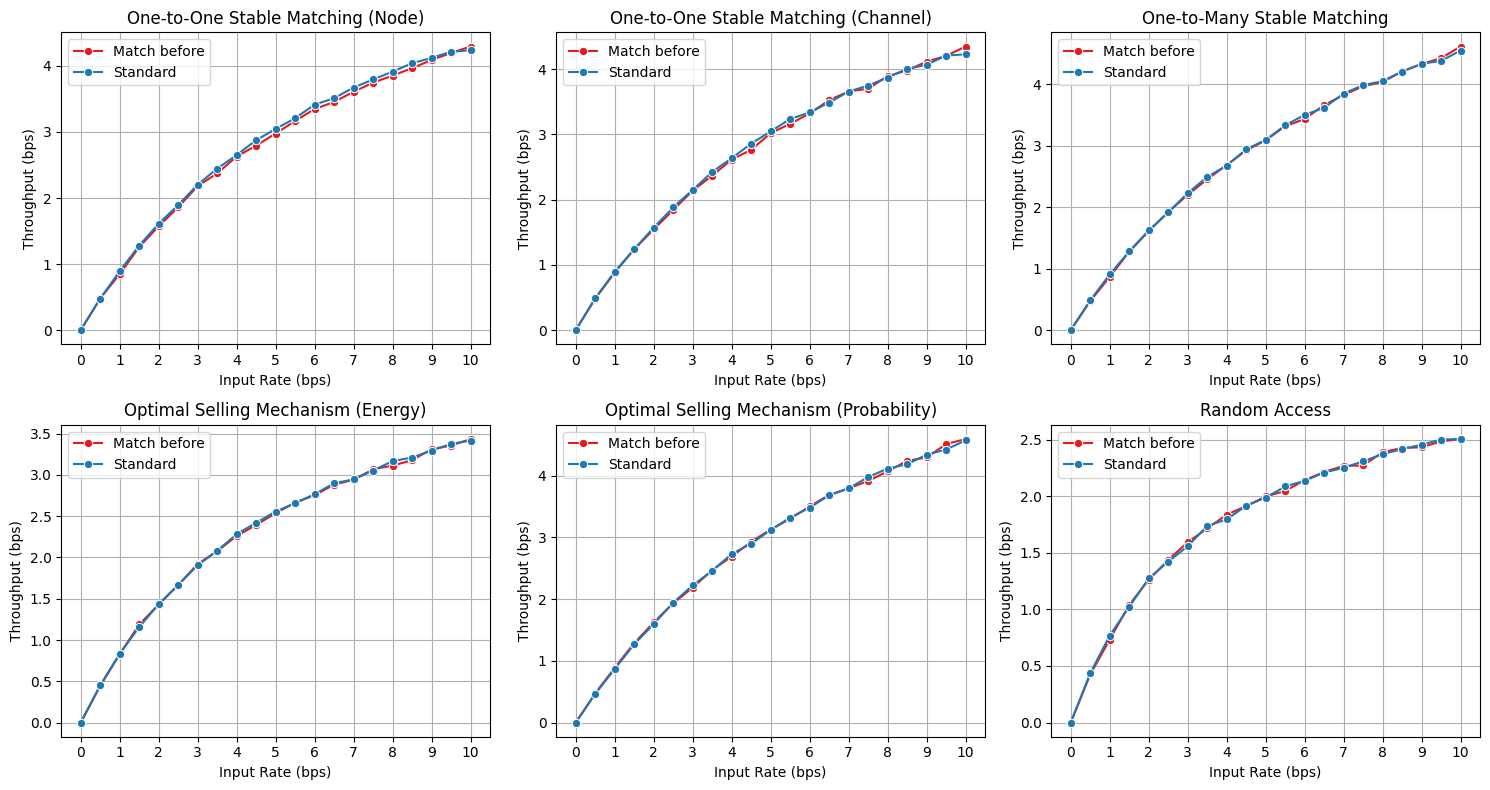

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_match_before = pd.DataFrame({
    'Input Rate': list(one_to_one_results_node_match_before.keys()) + list(one_to_one_results_channel_match_before.keys()) + list(one_to_many_results_match_before.keys()) + list(optimal_results_energy_match_before.keys()) + list(optimal_results_probability_match_before.keys()) + list(random_access_results_match_before.keys()),
    'Throughput': list(one_to_one_results_node_match_before.values()) + list(one_to_one_results_channel_match_before.values()) + list(one_to_many_results_match_before.values()) + list(optimal_results_energy_match_before.values()) + list(optimal_results_probability_match_before.values()) + list(random_access_results_match_before.values()),
    'Method': ['One-to-One Stable Matching (Node)']*len(one_to_one_results_node_match_before) + ['One-to-One Stable Matching (Channel)']*len(one_to_one_results_channel_match_before) + ['One-to-Many Stable Matching']*len(one_to_many_results_match_before) + ['Optimal Selling Mechanism (Energy)']*len(optimal_results_energy_match_before) + ['Optimal Selling Mechanism (Probability)']*len(optimal_results_probability_match_before) + ['Random Access']*len(random_access_results_match_before),
})

df_match_before['mode'] = 'Match before'
df_standard = df.copy()
df_standard['mode'] = ['Standard'] * len(df)

methods = df['Method'].unique()
fig, axes = plt.subplots(nrows=len(methods) // 3, ncols=3, figsize=(15, 8))

for method, ax in zip(methods, axes.flatten()):
    sns.lineplot(x='Input Rate', y='Throughput', data=df_match_before[df_match_before['Method'] == method], ax=ax, marker='o', errorbar=None, estimator=None, hue='mode', palette='Set1')
    sns.lineplot(x='Input Rate', y='Throughput', data=df_standard[df_standard['Method'] == method], ax=ax, marker='o', errorbar=None, estimator=None, hue='mode')
    ax.set_title(f'{method}')
    ax.set_xlabel('Input Rate (bps)')
    ax.set_ylabel('Throughput (bps)')
    ax.grid(True)
    ax.set_xticks(input_rates[::2])
    ax.legend(loc='best')

plt.tight_layout()
plt.show()

as expected, we observe marginal differences between the two methods, however between many methods, the difference is negligible.

### Consistent gains

in this section we simulate the results again, this time with channel gains being the same across all users to showcase the superiority of the **One-to-Many Stable Matching protocol** when there are clear *better channels*.

In [8]:
import protocols
from components import Network

num_nodes = 10
network = Network(num_nodes=num_nodes, per_user=False)
input_rates = [i * 0.5 for i in range(0, 2 * num_nodes + 1)]  # from 0.5 to 10 with step of 0.5

trial_length = 2400

# Simulation
one_to_one_results_node_consistent     = network.simulate(protocols.OneToOneStableMatching('node'), input_rates, trial_length=trial_length)
one_to_one_results_channel_consistent  = network.simulate(protocols.OneToOneStableMatching('channel'), input_rates, trial_length=trial_length)
one_to_many_results_consistent         = network.simulate(protocols.OneToManyStableMatching(3), input_rates, trial_length=trial_length)
optimal_results_energy_consistent      = network.simulate(protocols.OptimalSellingMechanism('energy'), input_rates, trial_length=trial_length)
optimal_results_probability_consistent = network.simulate(protocols.OptimalSellingMechanism('probability'), input_rates, trial_length=trial_length)
random_access_results_consistent       = network.simulate(protocols.RandomAccessProtocol(), input_rates, trial_length=trial_length)
random_matching_results_consistent     = { rate: rate / 4 for rate in input_rates }
optimal_matching_results_consistent    = { rate: sum([((num_nodes - i) / (num_nodes - i + 1)) ** 2 for i in range(int(rate))]) for rate in input_rates if int(rate) == rate}

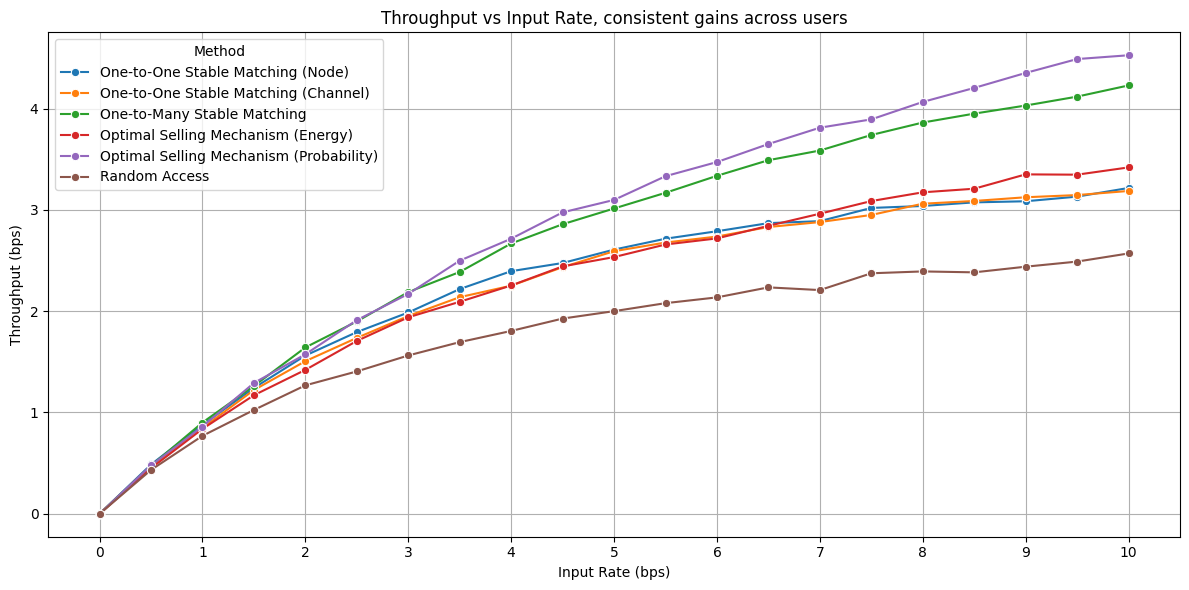

In [9]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_consistent = pd.DataFrame({
    'Input Rate': list(one_to_one_results_node_consistent.keys()) + list(one_to_one_results_channel_consistent.keys()) + list(one_to_many_results_consistent.keys()) + list(optimal_results_energy_consistent.keys()) + list(optimal_results_probability_consistent.keys()) + list(random_access_results_consistent.keys()),
    'Throughput': list(one_to_one_results_node_consistent.values()) + list(one_to_one_results_channel_consistent.values()) + list(one_to_many_results_consistent.values()) + list(optimal_results_energy_consistent.values()) + list(optimal_results_probability_consistent.values()) + list(random_access_results_consistent.values()),
    'Method': ['One-to-One Stable Matching (Node)']*len(one_to_one_results_node_consistent) + ['One-to-One Stable Matching (Channel)']*len(one_to_one_results_channel_consistent) + ['One-to-Many Stable Matching']*len(one_to_many_results_consistent) + ['Optimal Selling Mechanism (Energy)']*len(optimal_results_energy_consistent) + ['Optimal Selling Mechanism (Probability)']*len(optimal_results_probability_consistent) + ['Random Access']*len(random_access_results_consistent)
})

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x='Input Rate', y='Throughput', hue='Method', data=df_consistent, marker='o', errorbar=None, estimator=None)
plt.title('Throughput vs Input Rate, consistent gains across users')
plt.xlabel('Input Rate (bps)')
plt.ylabel('Throughput (bps)')
plt.grid(True)
plt.tight_layout()
plt.xticks(input_rates[::2])
plt.savefig('results_consistent.png')
df_consistent.to_csv('results_consistent.csv')
plt.show()

as expected, in this case we observe the clear superiority of the **One-to-Many Stable Matching** and **Optimal Selling Mechanism** protocols when there exists clear better channels.

### Effects of keeping messages

since we keep the message if it fails, when the input rate is low, we are almost guaranteed to be able to send our message eventually, reflected by our throughput being almost equal to our input rate in low rates, here we explicitly measure this effect and compare the results.

In [1]:
import protocols
from components import Network

num_nodes = 10
network = Network(num_nodes=num_nodes, match_before=False, keep_alive=False)
input_rates = [i * 0.5 for i in range(0, 2 * num_nodes + 1)]  # from 0.5 to 10 with step of 0.5

trial_length = 2400

# Simulation
one_to_one_results_node_dont_keep     = network.simulate(protocols.OneToOneStableMatching('node'), input_rates, trial_length=trial_length)
one_to_one_results_channel_dont_keep  = network.simulate(protocols.OneToOneStableMatching('channel'), input_rates, trial_length=trial_length)
one_to_many_results_dont_keep         = network.simulate(protocols.OneToManyStableMatching(3), input_rates, trial_length=trial_length)
optimal_results_energy_dont_keep      = network.simulate(protocols.OptimalSellingMechanism('energy'), input_rates, trial_length=trial_length)
optimal_results_probability_dont_keep = network.simulate(protocols.OptimalSellingMechanism('probability'), input_rates, trial_length=trial_length)
random_access_results_dont_keep       = network.simulate(protocols.RandomAccessProtocol(), input_rates, trial_length=trial_length)

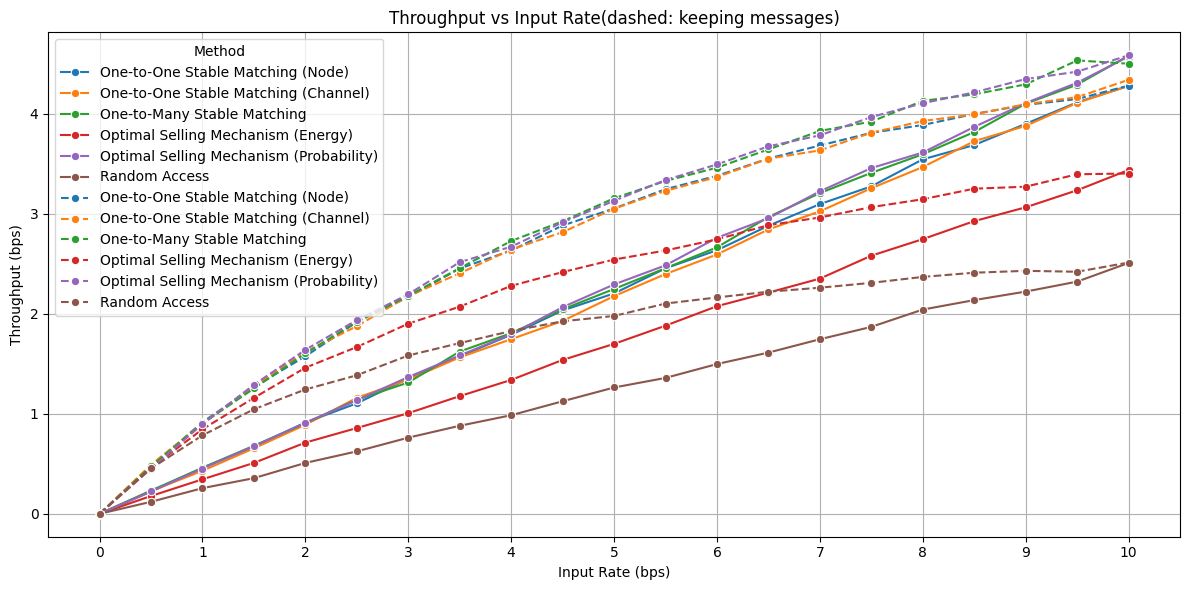

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_dont_keep = pd.DataFrame({
    'Input Rate': list(one_to_one_results_node_dont_keep.keys()) + list(one_to_one_results_channel_dont_keep.keys()) + list(one_to_many_results_dont_keep.keys()) + list(optimal_results_energy_dont_keep.keys()) + list(optimal_results_probability_dont_keep.keys()) + list(random_access_results_dont_keep.keys()),
    'Throughput': list(one_to_one_results_node_dont_keep.values()) + list(one_to_one_results_channel_dont_keep.values()) + list(one_to_many_results_dont_keep.values()) + list(optimal_results_energy_dont_keep.values()) + list(optimal_results_probability_dont_keep.values()) + list(random_access_results_dont_keep.values()),
    'Method': ['One-to-One Stable Matching (Node)']*len(one_to_one_results_node_dont_keep) + ['One-to-One Stable Matching (Channel)']*len(one_to_one_results_channel_dont_keep) + ['One-to-Many Stable Matching']*len(one_to_many_results_dont_keep) + ['Optimal Selling Mechanism (Energy)']*len(optimal_results_energy_dont_keep) + ['Optimal Selling Mechanism (Probability)']*len(optimal_results_probability_dont_keep) + ['Random Access']*len(random_access_results_dont_keep)
})

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x='Input Rate', y='Throughput', hue='Method', data=df_dont_keep, marker='o', errorbar=None, estimator=None)
sns.lineplot(x='Input Rate', y='Throughput', hue='Method', data=df, marker='o', errorbar=None, estimator=None, linestyle='dashed')
plt.title('Throughput vs Input Rate(dashed: keeping messages)')
plt.xlabel('Input Rate (bps)')
plt.ylabel('Throughput (bps)')
plt.grid(True)
plt.tight_layout()
plt.xticks(input_rates[::2])
plt.savefig('results_dont_keep.png')
df_dont_keep.to_csv('results_dont_keep.csv')
plt.show()

as we see, keeping the messages and not discarding the failed messages is worse than keeping them(obviously), and the effect is just that each message will be sent with the probability of success in the protocol, with no help from other time steps.

the two methods are equivalent in two cases, no messages and full input rate, thus not keeping the messages will yield linear throughput-input rate characteristics, and will be the line connecting the ends of our plots beforehand.

## Conclusion

This simulation study provides valuable insights into the performance of different matching protocols in a networked environment. with some intuitive explanation of the results.